<a href="https://colab.research.google.com/github/yoonyoung27/prac_class/blob/main/deeplearning_prac3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✓ Preparation settings : 런타임 유형 : GPU

✓ Import [Tensorflow](https://www.tensorflow.org/?hl=ko)

In [1]:
import tensorflow
tensorflow.keras.__version__

'2.4.0'

# Classifying newswires: a multi-class classification example

This notebook contains the code samples found in Chapter 3, Section 5 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff)

__Classify Reuters newswires into 46 different mutually-exclusive topics__. We have many classes and each data point should be classified into only __one__ category. It makes use of the Python library Keras, Reuters dataset.

✓ Ready for dataset

In [2]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


* We will use 10,000 most frequently used words

✓ information of dataset

In [3]:
print(len(train_data),
      len(test_data))

8982 2246


* It has 8,982 training examples and 2,246 test examples
* The label is an integer between 0 and 45 : a topic index.

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

\* Decode

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])  # How to decode the train_data[0]

557056/550378 [==============================] - 0s 0us/step


* Indices were offset by 3 because 0, 1 and 2 are reserved indices for "padding(연설·글 등을 길게 만들려고 불필요하게 넣은 군더더기)", "start of sequence", and "unknown"

In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

✓ Preparing data  
Make input shape same

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)        #Vectorized training data
x_test = vectorize_sequences(test_data)          #Vectorized testing data


def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)  #Vectorized training labels
one_hot_test_labels = to_one_hot(test_labels)    #Vectorized testing labels

#from tensorflow.keras.utils import to_categorical
#one_hot_train_labels = to_categorical(train_labels)
#one_hot_test_labels = to_categorical(test_labels) ; 위와 같은 식

* One-hot encoding  
ex. [0,2,5,1] -> ([1,0,0,0,0,0,0],[0,0,1,0,0,0,0],[0,0,0,0,0,1,0],[0,1,0,0,0,0,0])

In [8]:
train_labels[:5]

array([3, 4, 3, 4, 4])

In [9]:
one_hot_train_labels[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 

✓ Defining model

First, we will present our neural network with the training data, 'train_data' and 'train_labels'.

In [32]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

* If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers. A 16-dimensional space may be too limited to learn to separate 46 different classes. So it starts with 64 units

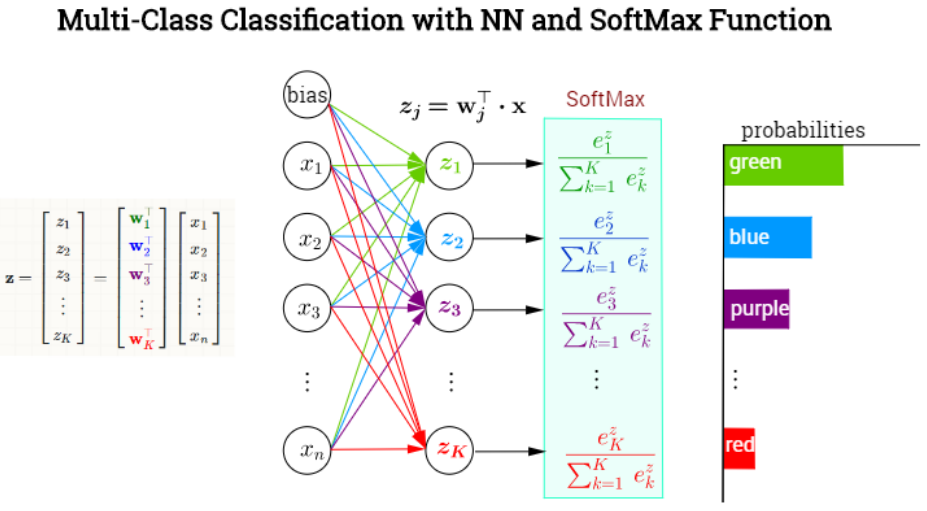

\* Relationship between softmax and sigmoid

In [ ]:
#model = models.Sequential()
#model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(16, activation='relu'))
#model.add(layers.Dense(2, activation='softmax'))
#
#model = models.Sequential()
#model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(16, activation='relu'))
#model.add(layers.Dense(1, activation=‘sigmoid')) ; 위와 같은 식

* 같은 형식의 식을 갖는다  
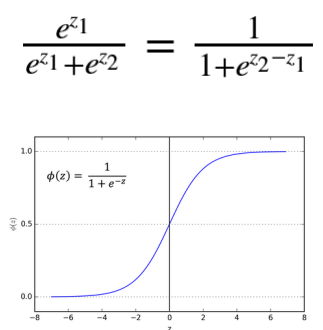

* 하지만 softmax는 sigmoid의 결과값을 categorical encoding한 결과값을 도출한다
* 또한 softmax는 categorical_crossentropy loss function을, sigmoid는 binary_crossentropy loss function을 사용한다

✓ Comfile

Second, prepare for network training

In [33]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

* categorical crossentropy measures the distance between two probability distributions : in our case, between the probability distribution output by our network

\* Setting validation testing set

In [34]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

* In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a "validation set" by setting apart 1,000 samples from the original training data

✓ Fit

Third, the network will learn to associate data and labels.

In [35]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 25ms/step - loss: 3.3816 - accuracy: 0.3047 - val_loss: 1.9612 - val_accuracy: 0.6520
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.6551 - accuracy: 0.7044 - val_loss: 1.3564 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.1018 - accuracy: 0.7775 - val_loss: 1.1605 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8963 - accuracy: 0.8146 - val_loss: 1.0890 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.7088 - accuracy: 0.8526 - val_loss: 1.0075 - val_accuracy: 0.7770
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5592 - accuracy: 0.8836 - val_loss: 0.9452 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4372 - accuracy: 0.9110 - val_loss: 0.9155 - val_accuracy: 0.8130
Epoch 8/20
16

* This model trains our model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples
* At the same time, it will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing the validation data as the validation_data argument

✓ Analyzing  
See what happened during training from a History object returned from model.fit() method

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

* It contains 4 entries: one per metric that was being monitored, during training and during validation

\* Plot the training and validation loss side by side, as well as the training and validation accuracy by using Matplotlib

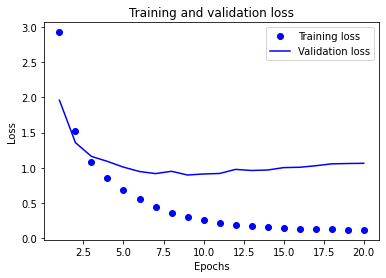

In [37]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

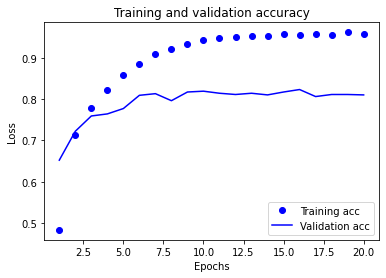

In [38]:
plt.clf()  # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

* the network starts overfitting after 8 epochs

✓ Make up for a problem to take a step forward

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 25ms/step - loss: 3.1650 - accuracy: 0.4408 - val_loss: 1.7373 - val_accuracy: 0.6650
Epoch 2/8
16/16 [==============================] - 0s 15ms/step - loss: 1.4751 - accuracy: 0.7056 - val_loss: 1.3001 - val_accuracy: 0.7140
Epoch 3/8
16/16 [==============================] - 0s 15ms/step - loss: 1.0730 - accuracy: 0.7725 - val_loss: 1.1509 - val_accuracy: 0.7420
Epoch 4/8
16/16 [==============================] - 0s 16ms/step - loss: 0.8506 - accuracy: 0.8175 - val_loss: 1.0309 - val_accuracy: 0.7900
Epoch 5/8
16/16 [==============================] - 0s 15ms/step - loss: 0.6644 - accuracy: 0.8593 - val_loss: 0.9803 - val_accuracy: 0.7880
Epoch 6/8
16/16 [==============================] - 0s 15ms/step - loss: 0.5315 - accuracy: 0.8883 - val_loss: 0.9030 - val_accuracy: 0.8170
Epoch 7/8
16/16 [==============================] - 0s 15ms/step - loss: 0.4252 - accuracy: 0.9112 - val_loss: 0.9144 - val_accuracy: 0.8060
Epoch 8/8
71/71 [===

In [ ]:
results

[1.0064433813095093, 0.7804986834526062]

In [ ]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.182546749777382

* 78% seems pretty good at least when compared to the accuracy of random classifier(19%)

✓ Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

In [ ]:
print(predictions[0].shape,
      np.sum(predictions[0]),
      np.argmax(predictions[0]))

(46,) 1.0000001 3


* Each entry in `predictions` is a vector of length 46 sum to 1
* 3rd argument of predictions[0] has the highest value

\* A different way to handle the labels and the loss

In [40]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [41]:
y_train[:5]

array([3, 4, 3, 4, 4])

* With categorical encoding labels (with preparing data), we use `categorical_crossentropy`. With integer labels (without preparing data), we use `sparse_categorical_crossentropy`
* This loss function is still mathematically the same as `categorical_crossentropy`, but it just has a different interface.

## Further experiments

* Try using larger or smaller layers: 32 units, 128 units...
* We were using two hidden layers. Now try to use a single hidden layer, or three hidden layers.

# Conclusions


Here's what you should take away from this example:

* If you are trying to classify data points between N classes, your network should end with a `Dense` layer of size N.
* In a single-label, multi-class classification problem, your network should end with a `softmax` activation, so that it will output a 
probability distribution over the N output classes.
* _Categorical crossentropy_ is almost always the loss function you should use for such problems. It minimizes the distance between the 
probability distributions output by the network, and the true distribution of the targets.
* There are two ways to handle labels in multi-class classification:
    ** Encoding the labels via "categorical encoding" (also known as "one-hot encoding") and using `categorical_crossentropy` as your loss 
function.
    ** Encoding the labels as integers and using the `sparse_categorical_crossentropy` loss function.
* If you need to classify data into a large number of categories, then you should avoid creating information bottlenecks in your network by having 
intermediate layers that are too small.